In [1]:
!pip install sentence_transformers

## Load corpus

In [2]:
from globals import CORPUS_PATH
from utils import load_corpus

In [3]:
corpus = load_corpus(CORPUS_PATH)
corpus[:1]

[{'id': 1,
  'category': 'business',
  'content': 'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the

# Semantic BERT embeddings 
https://www.sbert.net/docs/pretrained_models.html

In [4]:
from sentence_transformers import SentenceTransformer, util
from models import Corpus, Result
from utils import print_resuts

class EmbeddingModel():
    def __init__(self, model_name, corpus:Corpus):
        self.model = SentenceTransformer(model_name)
        self.corpus = corpus
        self.document_embeddings = self.model.encode([doc["content"] for doc in self.corpus])

    def launch_query(self, query, k=5):
        query_embedding = self.model.encode(query)
        cos_sim_scores = util.cos_sim(query_embedding, self.document_embeddings).tolist()[0]
        results = [ Result(id=i, content=doc["content"], category= doc["category"], score=cos_sim_scores[i] ) 
                   for i, doc in enumerate(self.corpus) ]
        
        sorted_results = sorted(results, key=lambda x: x.score, reverse=True)

        print_resuts(sorted_results[:k])

        return sorted_results
    

In [5]:
model = EmbeddingModel(model_name='all-mpnet-base-v2', corpus=corpus)

In [6]:
results = model.launch_query("business")

 1. [ Score = 0.350 ] Category politics |  ID: 1422 | Text: uk firms  embracing e-commerce  uk firms are embra
 2. [ Score = 0.336 ] Category business |  ID: 184 | Text: businesses fail to plan for hiv companies fail to 
 3. [ Score = 0.317 ] Category sport |  ID: 1870 | Text: cebit fever takes over hanover thousands of produc
 4. [ Score = 0.315 ] Category business |  ID: 1366 | Text: business fears over sluggish eu economy as europea
 5. [ Score = 0.312 ] Category tech |  ID: 2151 | Text: small firms  hit by rising costs  rising fuel and 


In [7]:
str(results[0])

'Document ID: 1422, Category: politics, Score: 0.35\nContent: uk firms  embracing ...'

In [8]:
results[0]

Result(id=1422, content='uk firms  embracing e-commerce  uk firms are embracing internet trading opportunities as never before  e-commerce minister mike o brien says.  a government-commissioned study ranked the uk third in its world index of use of information and communication technology (ict). the report suggests 69% of uk firms are now using broadband and that 30% of micro businesses are trading online. mr o brien said uk businesses were sprinting forward in ict use  but that there were more challenges ahead. the report  carried out independently by consultants booz allen hamilton and hi europe  placed the uk third behind sweden and ireland for business use of ict.  it showed british business brought greater maturity to their ict use  by using broadband in increased numbers  bringing ict into their business plans and using new technologies such as voice activated programmes and desktop video conferences. mr o brien said:  the increase in the proportion of business connected by broad

In [9]:
print(len(results))

2225


# Evaluation

In [10]:
from evaltools import evaluate
from utils import process_results
from models import Query

In [33]:
method= 'prec_rec' 

In [11]:
categories = ['politics', 'entertainment', 'sport', 'tech', 'business']

In [12]:
queries_normal = [ Query(category=c, content=c) for c in categories]
queries_normal

[Query(category='politics', content='politics'),
 Query(category='entertainment', content='entertainment'),
 Query(category='sport', content='sport'),
 Query(category='tech', content='tech'),
 Query(category='business', content='business')]

Query 1: category='politics' content='politics'
 1. [ Score = 0.464 ] Category politics |  ID: 514 | Text: how political squabbles snowball it s become commo
 2. [ Score = 0.415 ] Category sport |  ID: 1800 | Text: teens  know little  of politics teenagers question
 3. [ Score = 0.405 ] Category tech |  ID: 981 | Text: online games play with politics after bubbling und
 4. [ Score = 0.389 ] Category business |  ID: 1119 | Text: iraqi voters turn to economic issues beyond the de
 5. [ Score = 0.389 ] Category politics |  ID: 671 | Text: uk youth  interested  in politics the majority of 
-----
Query 2: category='entertainment' content='entertainment'
 1. [ Score = 0.335 ] Category tech |  ID: 981 | Text: online games play with politics after bubbling und
 2. [ Score = 0.330 ] Category entertainment |  ID: 2048 | Text: games  deserve a place in class  computer games co
 3. [ Score = 0.317 ] Category tech |  ID: 1631 | Text: mobile picture power in your pocket how many times
 4. [ Score = 

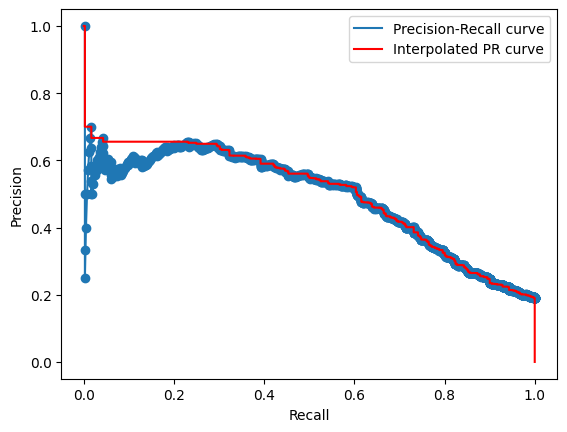

	Query 2


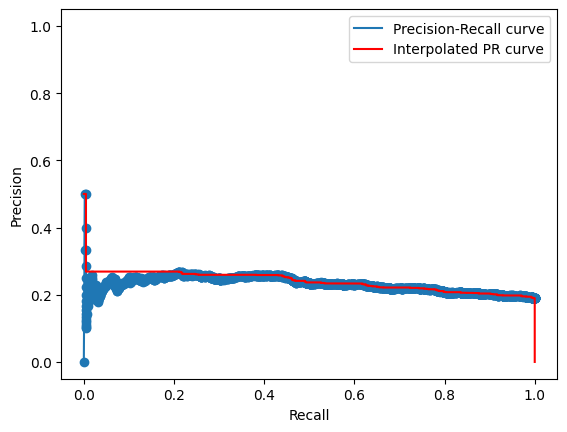

	Query 3


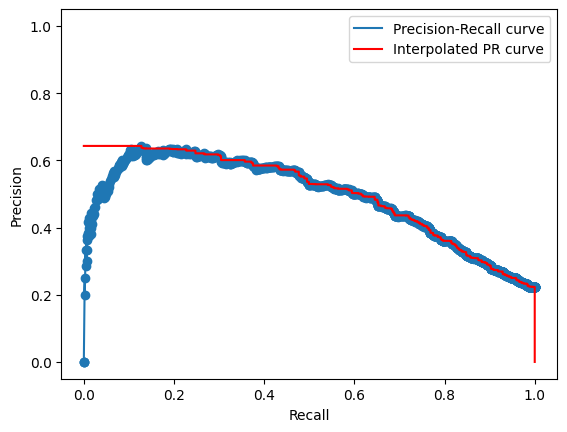

	Query 4


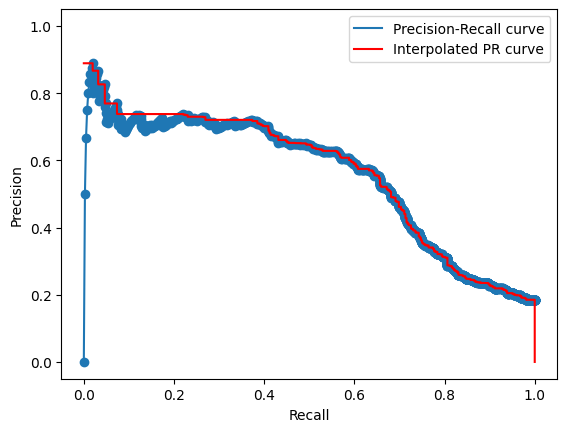

	Query 5


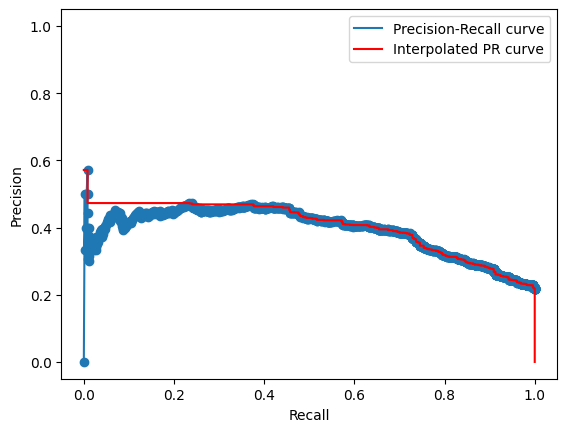

In [34]:
results, relevances = process_results(model, queries_normal)
evaluate(method, results, relevances)

method='prec_rec' 
evaluate(method,Q,R)

# Queries with def

In [35]:
import json

from globals import DEF_PATH

with open(DEF_PATH) as f:
    defs = json.load(f)

In [36]:
defs

{'politics': 'Politics include topics related to government, political parties, elections, policies, and political figures, commentary, and reporting on political developments at local, national, and international levels.',
 'entertainment': 'Entertainment encompasses topics related  to movies, television shows, music, theater, celebrity gossip, and cultural events. It includes reviews, interviews, previews, and news related to the entertainment industry.',
 'sport': 'Sport covers various athletic activities, competitions, and events. It includes coverage of popular sports such as football, basketball, soccer, baseball, tennis, and more. This category provides updates, scores, analysis, and commentary on sports news and events.',
 'tech': 'Tech focuses on technology-related news, innovations, gadgets, software, and digital trends. It covers topics such as smartphones, computers, artificial intelligence, cybersecurity, internet culture, and emerging technologies.',
 'business': 'Busines

In [37]:
queries_defs = [Query(category=c, content=defs[c]) for c in categories]
queries_defs

[Query(category='politics', content='Politics include topics related to government, political parties, elections, policies, and political figures, commentary, and reporting on political developments at local, national, and international levels.'),
 Query(category='entertainment', content='Entertainment encompasses topics related  to movies, television shows, music, theater, celebrity gossip, and cultural events. It includes reviews, interviews, previews, and news related to the entertainment industry.'),
 Query(category='sport', content='Sport covers various athletic activities, competitions, and events. It includes coverage of popular sports such as football, basketball, soccer, baseball, tennis, and more. This category provides updates, scores, analysis, and commentary on sports news and events.'),
 Query(category='tech', content='Tech focuses on technology-related news, innovations, gadgets, software, and digital trends. It covers topics such as smartphones, computers, artificial in

Query 1: category='politics' content='Politics include topics related to government, political parties, elections, policies, and political figures, commentary, and reporting on political developments at local, national, and international levels.'
 1. [ Score = 0.472 ] Category tech |  ID: 981 | Text: online games play with politics after bubbling und
 2. [ Score = 0.417 ] Category tech |  ID: 1316 | Text: blogs take on the mainstream web logs or blogs are
 3. [ Score = 0.413 ] Category sport |  ID: 1800 | Text: teens  know little  of politics teenagers question
 4. [ Score = 0.399 ] Category politics |  ID: 671 | Text: uk youth  interested  in politics the majority of 
 5. [ Score = 0.375 ] Category tech |  ID: 1076 | Text: blog reading explodes in america americans are bec
-----
Query 2: category='entertainment' content='Entertainment encompasses topics related  to movies, television shows, music, theater, celebrity gossip, and cultural events. It includes reviews, interviews, preview

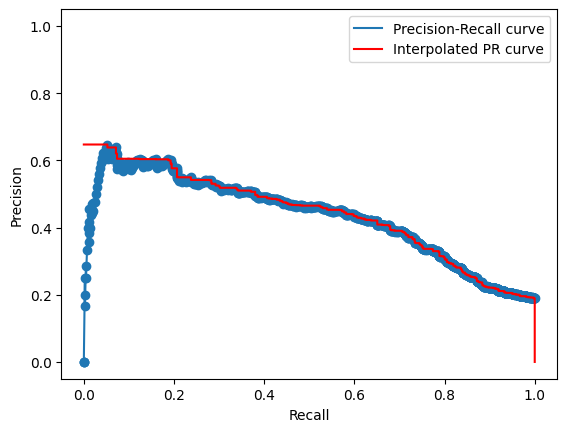

	Query 2


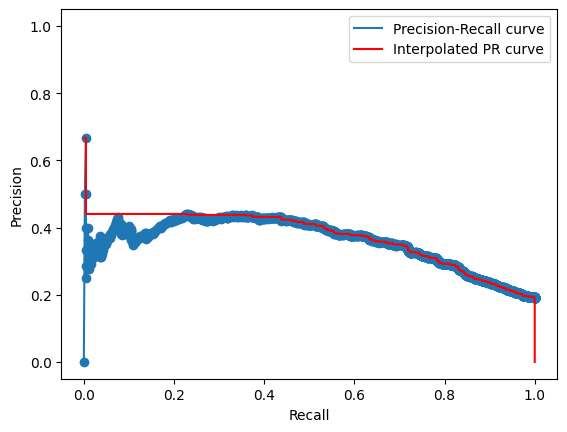

	Query 3


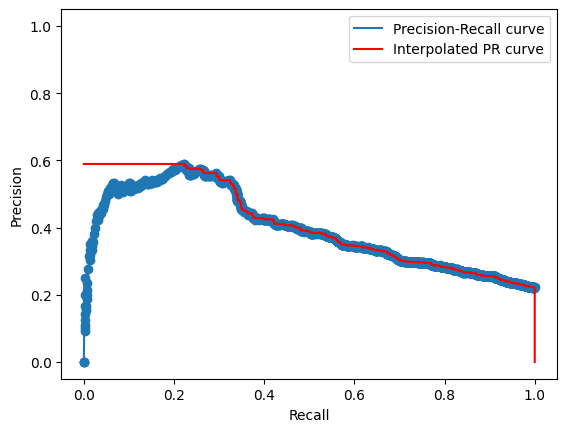

	Query 4


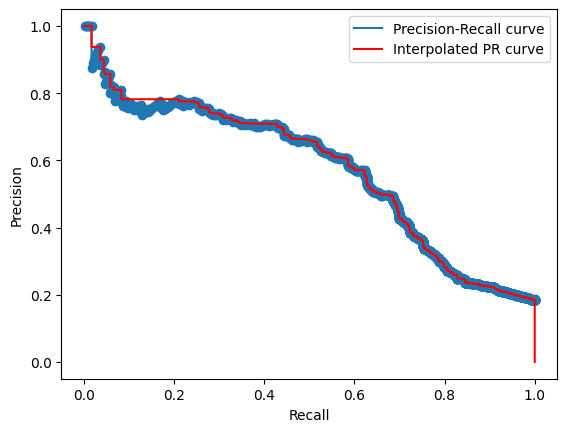

	Query 5


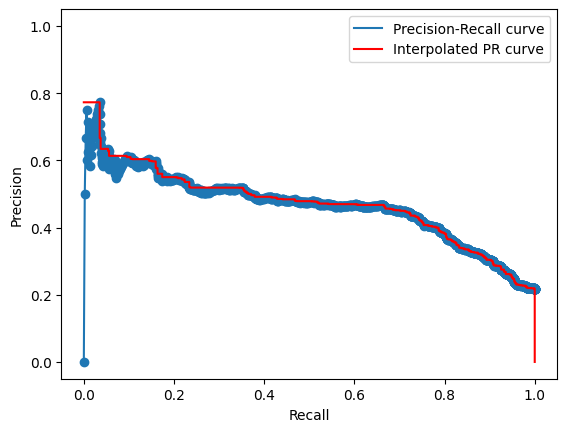

In [38]:
results, relevances = process_results(model, queries_defs)
evaluate(method, results, relevances)

# Queries with max word

In [40]:
from globals import WORDS_PATH

with open(WORDS_PATH) as f:
    max_words = json.load(f)

In [41]:
queries_max = [ Query(category=c, content=" ".join(max_words[c])) for c in categories]
queries_max

[Query(category='politics', content='show scot fish miliband lindsay houston blackpool phon independ immigr club bbc arrest cunningham heal collin mus sent cre id palestin baa pound schools prim card kewel party soc clim sony bil govern pend cag wag campaign juninho fed post anim fiat ag issu famy robot hagu benefit mr drink bord window rac brit argentin wal edward said britain forens print muslim vot sal santin referend tobacco gam 000 limit iv aid text un jamieson film men kirw 7e7 yahoo stud bank hunt min jap award review deb cel win research broadband barcelon pearc peopl search lvmh e-university off spur brown court deal ballot access col inform pol roch sport asyl afric lord star bry microsoft wait ter jet adv duchy scrushy movy howard jowel fry thanou ukip trust deport childr may casino kilroy-silk us budget liverpool nuclear ba pay parlia company fig new airport prison clos mcal appoint busy uk khan fin podcast law iaaf car osbourn sit yuko mcclaren lib sainsbury coach digit es

Query 1: category='politics' content='show scot fish miliband lindsay houston blackpool phon independ immigr club bbc arrest cunningham heal collin mus sent cre id palestin baa pound schools prim card kewel party soc clim sony bil govern pend cag wag campaign juninho fed post anim fiat ag issu famy robot hagu benefit mr drink bord window rac brit argentin wal edward said britain forens print muslim vot sal santin referend tobacco gam 000 limit iv aid text un jamieson film men kirw 7e7 yahoo stud bank hunt min jap award review deb cel win research broadband barcelon pearc peopl search lvmh e-university off spur brown court deal ballot access col inform pol roch sport asyl afric lord star bry microsoft wait ter jet adv duchy scrushy movy howard jowel fry thanou ukip trust deport childr may casino kilroy-silk us budget liverpool nuclear ba pay parlia company fig new airport prison clos mcal appoint busy uk khan fin podcast law iaaf car osbourn sit yuko mcclaren lib sainsbury coach digit e

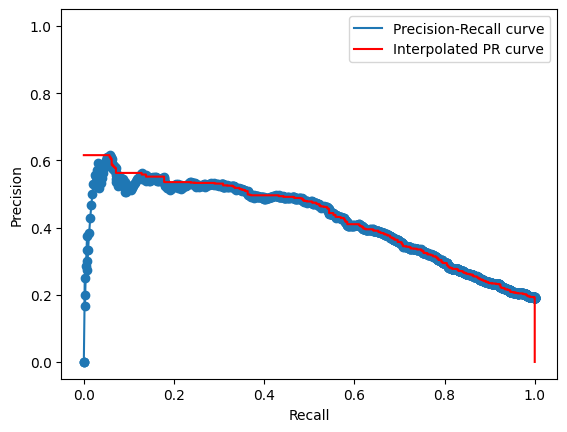

	Query 2


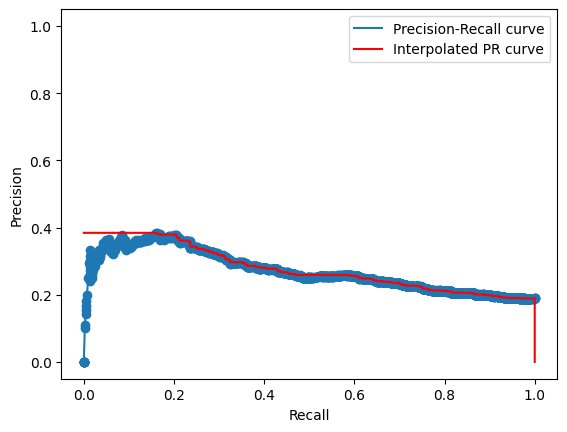

	Query 3


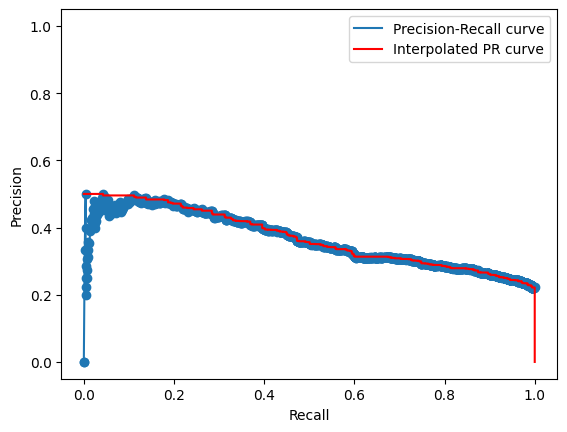

	Query 4


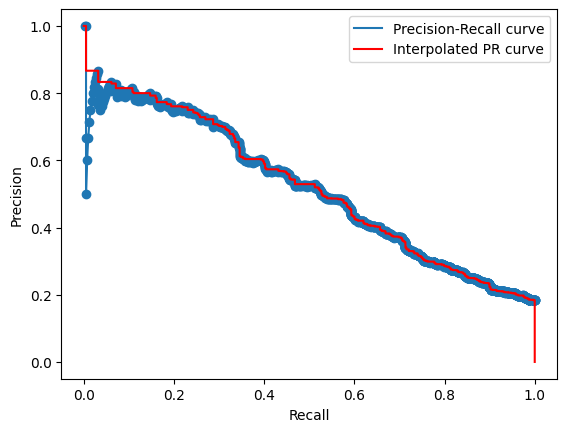

	Query 5


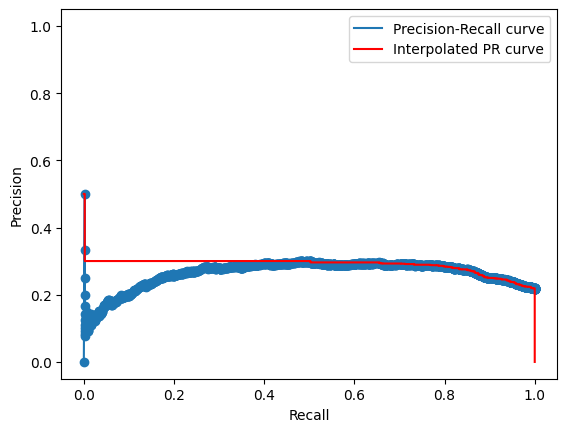

In [42]:
results, relevances = process_results(model, queries_max)
evaluate(method, results, relevances)